# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [4]:
import scipy.io
mat = scipy.io.loadmat('data/ejer_1_data1.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [8]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

In [9]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [10]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [12]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [13]:
df['y'].value_counts()

0    30
1    21
Name: y, dtype: int64

#### 4. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

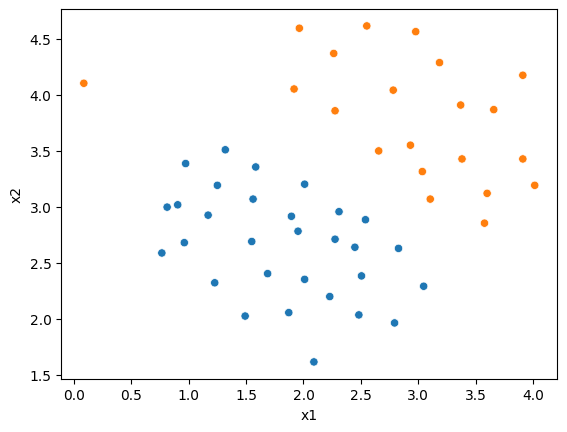

In [15]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y', legend=False)

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [9]:
from sklearn.svm import LinearSVC

svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [17]:
X = df[['x1','x2']]
y = df['y']

svc_1.fit(X, y)
svc_1.score(X, y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [23]:
svc_2 = LinearSVC(C=1000, loss='hinge', max_iter=1000000)
svc_2.fit(X, y)
svc_2.score(X, y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [24]:
conf_level = svc_1.decision_function(X)
conf_level

array([ 0.80284974,  0.38393027,  1.37751117,  0.52118934,  0.3334279 ,
        0.86872605,  0.6865447 ,  1.61123355,  0.83450207,  1.1671517 ,
        1.07326164,  0.22982812,  0.33184235,  0.79582667,  0.31581682,
        1.27411311,  1.2102169 ,  1.        ,  0.56476985,  0.3899154 ,
       -0.43521098, -0.30878141, -0.68619207, -0.55394911, -0.33243765,
       -0.29376225, -0.44062092, -0.98391117, -0.68555445, -1.32841115,
       -1.00372204, -1.4922522 , -0.61135536, -0.68338624, -0.99997876,
       -1.15267999, -1.57835189, -1.35593456, -1.03234654, -1.18499752,
       -0.77136481, -0.76687292, -0.46644849, -0.99991802, -0.51025919,
       -0.8585527 , -1.55895424, -0.25481619, -1.11360186, -1.54714795,
       -0.70991899])

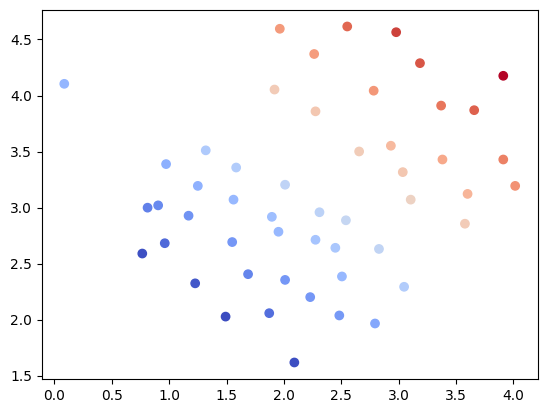

In [30]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='coolwarm')

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

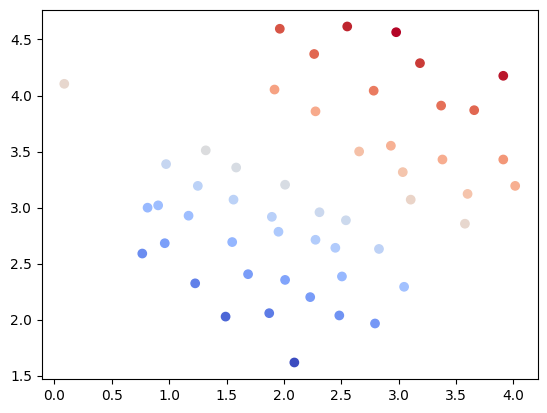

In [31]:
conf_level = svc_2.decision_function(X)
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='coolwarm')

y = a*x1 + b*x2 + c

0 = a*x1 + b*x2 + c

b*x2 = -a*x1 - c

x2 = -a/b*x1 - c/b

In [37]:
svc_1.coef_[0]

array([0.5915367 , 0.81825107])

In [38]:
a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_

In [39]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

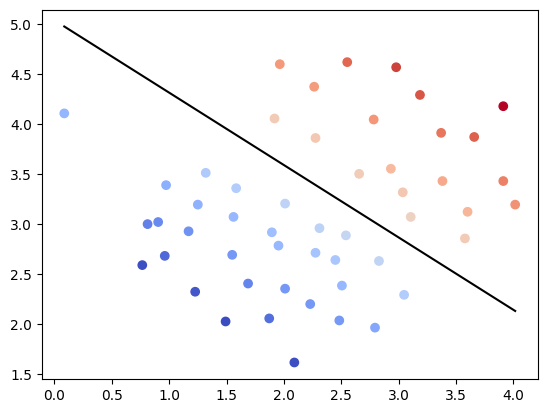

In [41]:
conf_level = svc_1.decision_function(X)
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='coolwarm')
plt.plot(x_points, y_points, color='black')

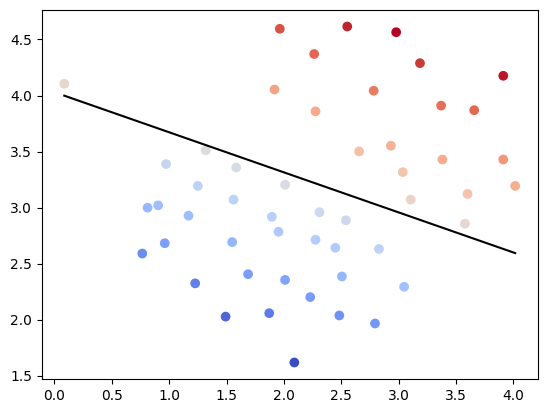

In [42]:
a = svc_2.coef_[0][0]
b = svc_2.coef_[0][1]
c = svc_2.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b
conf_level = svc_2.decision_function(X)
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='coolwarm')
plt.plot(x_points, y_points, color='black')

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [5]:
mat = scipy.io.loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

#### 2. Create a DataFrame with the features and target

In [6]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

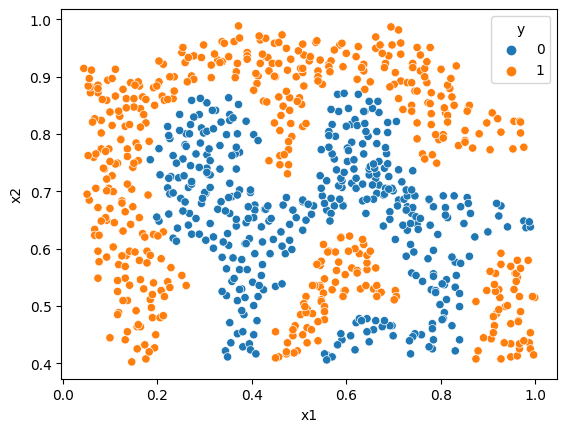

In [7]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y')

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

0.5538818076477404


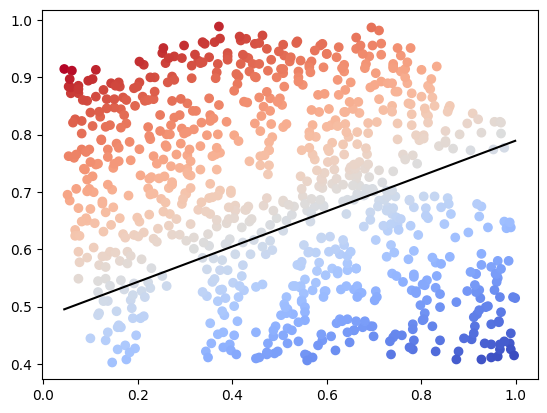

In [10]:
X = df[['x1','x2']]
y = df['y']

svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)
svc_1.fit(X, y)
print(svc_1.score(X, y))

a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b
conf_level = svc_1.decision_function(X)

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='coolwarm')
plt.plot(x_points, y_points, color='black')

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [11]:
from sklearn.svm import SVC

svc_3 = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [12]:
svc_3.fit(X, y)

SVC(C=100, gamma=10, probability=True)

In [13]:
svc_3.score(X, y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [14]:
y_pred_proba = svc_3.predict_proba(X)
y_pred_proba[:,1]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99999617e-01,
       9.95484461e-01, 9.99988817e-01, 9.99999955e-01, 9.91459128e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.89950551e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       7.60185936e-01, 4.18033234e-01, 1.00000000e+00, 1.00000000e+00,
       9.88177316e-01, 9.99993671e-01, 9.93067449e-01, 8.87936473e-01,
       9.84797055e-01, 9.99998758e-01, 9.99999396e-01, 9.99999869e-01,
       9.99998162e-01, 9.80812253e-01, 8.49705724e-01, 9.76189154e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999998e-01, 9.99999912e-01,
       9.99993760e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

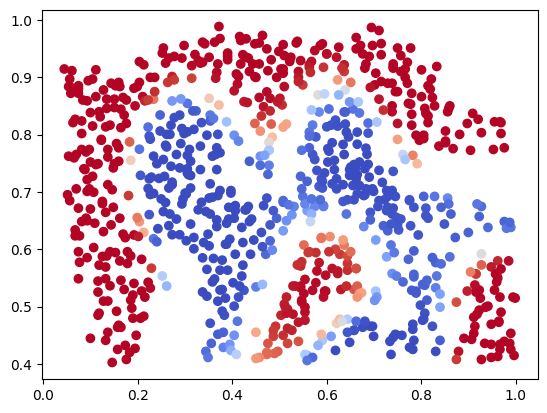

In [87]:
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(690, 2)
(173, 2)
(690,)
(173,)


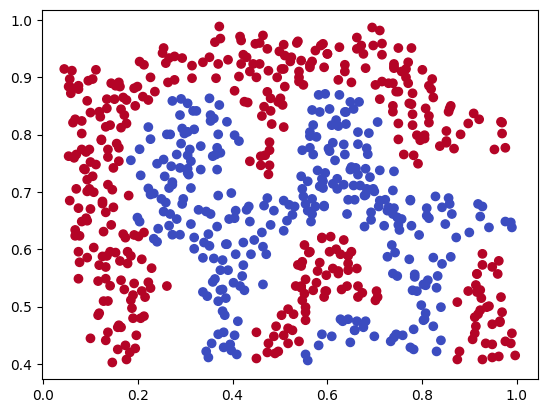

In [16]:
plt.scatter(X_train['x1'], X_train['x2'], c=y_train, cmap="coolwarm")

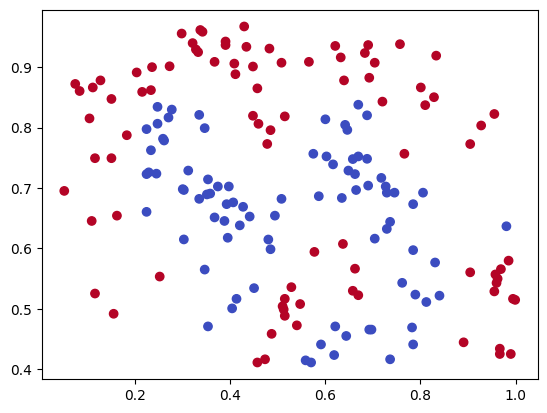

In [17]:
plt.scatter(X_test['x1'], X_test['x2'], c=y_test, cmap="coolwarm")

In [25]:
parameters = {
    "kernel" : ['rbf', 'poly'],
    'C': [50, 100, 200]
}

gs = GridSearchCV(svc_3, parameters, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=SVC(C=100, gamma=10, probability=True), n_jobs=-1,
             param_grid={'C': [50, 100, 200], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [26]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'C': 100, 'kernel': 'rbf'}
0.9550724637681158
SVC(C=100, gamma=10, probability=True)


In [23]:
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9595375722543352
[[84  1]
 [ 6 82]]
